

# KNN & PCA

## 21. **Train a KNN Classifier on the Iris dataset and print model accuracy.**


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Using k=3 as a starting point
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy on Iris Dataset: {accuracy:.2f}")


KNN Classifier Accuracy on Iris Dataset: 1.00


### 22. **Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)**

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # k = 5
knn_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"KNN Regressor Mean Squared Error: {mse:.2f}")


KNN Regressor Mean Squared Error: 437.35


# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN with Euclidean distance (default)
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# KNN with Manhattan distance (L1)
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print accuracy results
print(f"Accuracy with Euclidean distance: {acc_euclidean:.2f}")
print(f"Accuracy with Manhattan distance: {acc_manhattan:.2f}")


Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


# 24. Train a KNN Classifier with different values of K and visualize decision boundaries

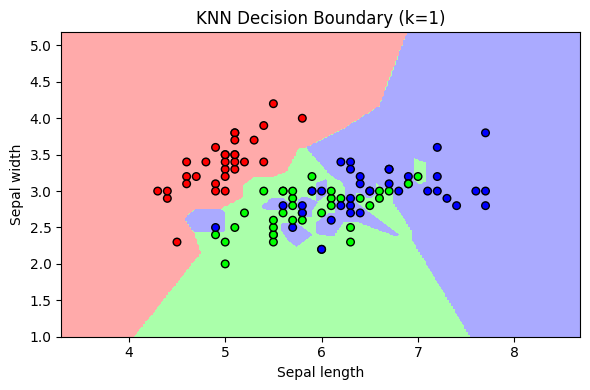

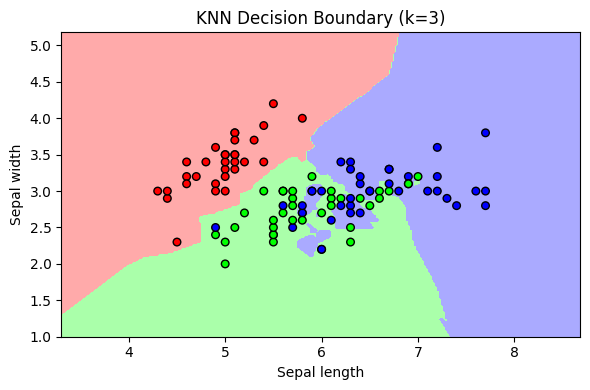

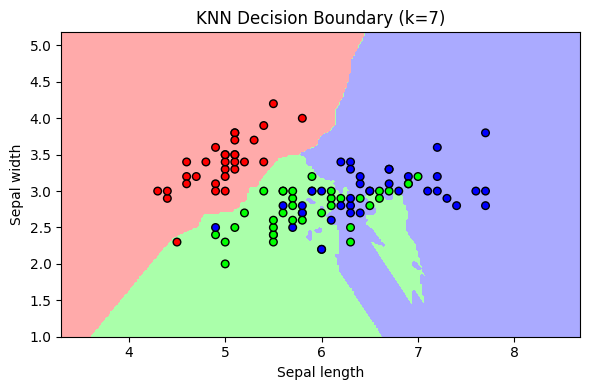

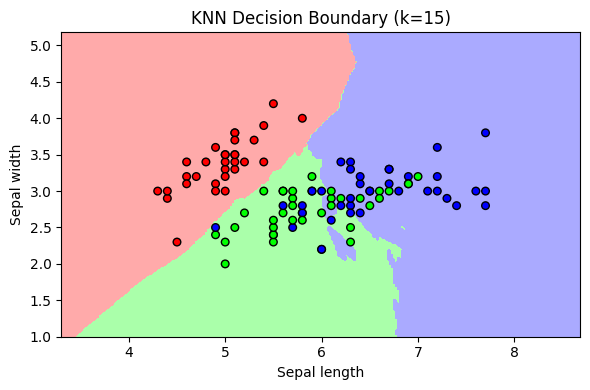

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load Iris dataset (use only 2 features for 2D plotting)
iris = load_iris()
X = iris.data[:, :2]  # Use sepal length and width
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define meshgrid function for plotting decision boundaries
def plot_decision_boundary(knn, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Try different values of K
for k in [1, 3, 7, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(knn, X_train, y_train, f"KNN Decision Boundary (k={k})")


# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data





In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------- Without Scaling -----------
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# ----------- With Feature Scaling -----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# ----------- Results -----------
print(f"Accuracy without scaling: {acc_unscaled:.2f}")
print(f"Accuracy with scaling:    {acc_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with scaling:    1.00


# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component

In [6]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import numpy as np

# Create synthetic dataset with 5 features
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(X)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display results
for i, ratio in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {ratio:.4f} variance explained")


Principal Component 1: 0.5166 variance explained
Principal Component 2: 0.3511 variance explained
Principal Component 3: 0.1323 variance explained
Principal Component 4: 0.0000 variance explained
Principal Component 5: 0.0000 variance explained


# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- KNN without PCA -----
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

# ----- Apply PCA -----
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ----- KNN with PCA -----
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# ----- Results -----
print(f"KNN Accuracy without PCA: {acc_no_pca:.2f}")
print(f"KNN Accuracy with PCA:    {acc_pca:.2f}")


KNN Accuracy without PCA: 1.00
KNN Accuracy with PCA:    0.96


# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create KNN Classifier
knn = KNeighborsClassifier()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Best accuracy: 0.95
Test set accuracy: 1.00


# 29. Train a KNN Classifier and check the number of misclassified samples

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

# Calculate number of misclassified samples
misclassified_samples = (y_pred != y_test).sum()
print(f"Number of misclassified samples: {misclassified_samples}")


KNN Accuracy: 1.00
Number of misclassified samples: 0


# 30. Train a PCA model and visualize the cumulative explained variance


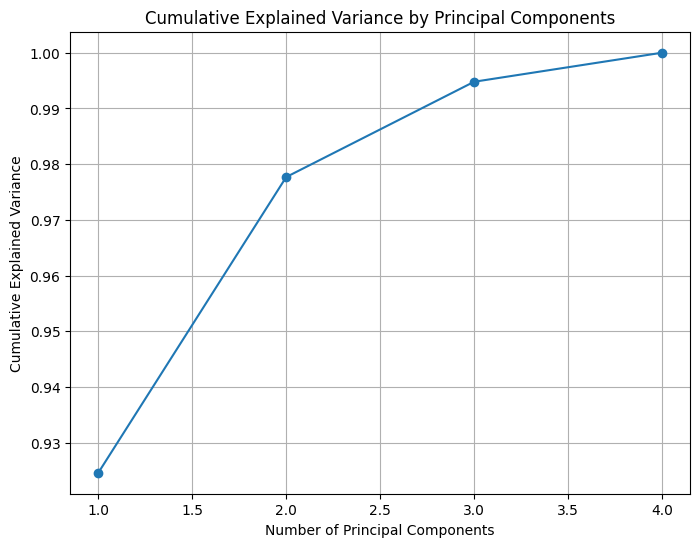

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

# KNN with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
acc_distance = accuracy_score(y_test, y_pred_distance)

# Results
print(f"Accuracy with uniform weights: {acc_uniform:.2f}")
print(f"Accuracy with distance weights: {acc_distance:.2f}")


Accuracy with uniform weights: 1.00
Accuracy with distance weights: 1.00


32. Train a KNN Regressor and analyze the effect of different K values on performance

# New Section

In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different values of K
for k in [1, 3, 5, 7, 9]:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE with K={k}: {mse:.2f}")


MSE with K=1: 527.88
MSE with K=3: 446.63
MSE with K=5: 522.32
MSE with K=7: 557.87
MSE with K=9: 595.55


33. Implement KNN Imputation for handling missing values in a dataset


In [13]:
from sklearn.impute import KNNImputer
import numpy as np

# Create a dataset with missing values
X = np.array([[1, 2, np.nan], [3, 4, 5], [6, 7, 8], [9, 10, 11], [13, 14, 15]])

# KNN imputer
imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)

print("Original Data with Missing Values:")
print(X)
print("\nData After KNN Imputation:")
print(X_imputed)


Original Data with Missing Values:
[[ 1.  2. nan]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]
 [13. 14. 15.]]

Data After KNN Imputation:
[[ 1.   2.   6.5]
 [ 3.   4.   5. ]
 [ 6.   7.   8. ]
 [ 9.  10.  11. ]
 [13.  14.  15. ]]


# 34. Train a PCA model and visualize the data projection onto the first two principal components

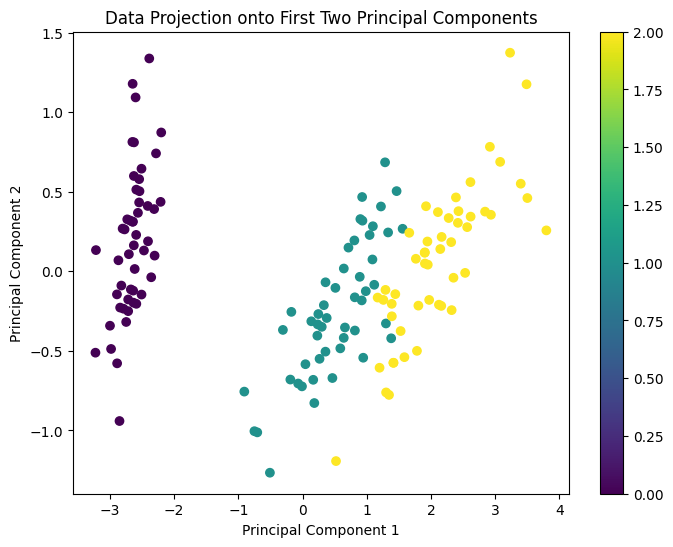

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data in the new 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection onto First Two Principal Components')
plt.colorbar()
plt.show()


# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load classification dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN with KDTree algorithm
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)
acc_kdtree = accuracy_score(y_test, y_pred_kdtree)

# KNN with BallTree algorithm
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)
acc_balltree = accuracy_score(y_test, y_pred_balltree)

# Print the results
print(f"Accuracy with KDTree: {acc_kdtree:.2f}")
print(f"Accuracy with BallTree: {acc_balltree:.2f}")


Accuracy with KDTree: 1.00
Accuracy with BallTree: 1.00


36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot



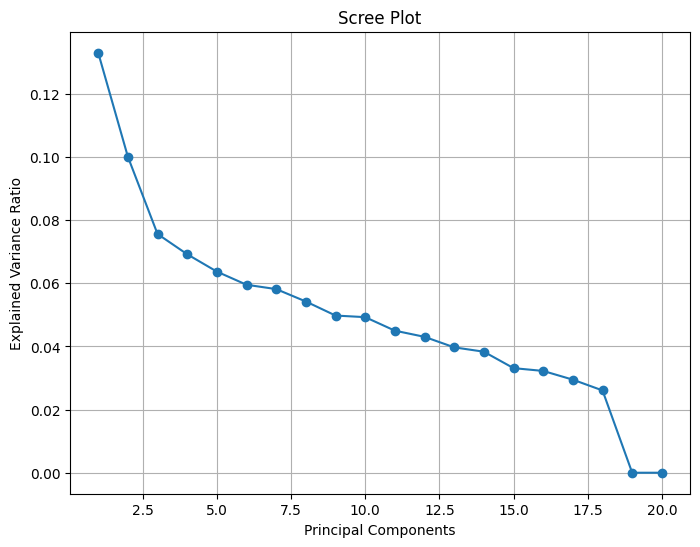

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create a high-dimensional synthetic dataset
X, y = make_classification(n_samples=200, n_features=20, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X)

# Plot Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load classification dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and calculate performance metrics
y_pred = knn.predict(X_test)

# Evaluate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy

In [24]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load classification dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier with different PCA components
for n in [1, 2, 3, 4]:
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)

    # Predict and calculate accuracy
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {n} PCA components: {acc:.2f}")


Accuracy with 1 PCA components: 0.98
Accuracy with 2 PCA components: 1.00
Accuracy with 3 PCA components: 1.00
Accuracy with 4 PCA components: 1.00


# 39. Train a KNN Classifier with different leaf_size values and compare accuracy

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load classification dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different leaf_size values with Ball Tree
for leaf_size in [10, 20, 30, 40]:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with leaf_size={leaf_size}: {acc:.2f}")


Accuracy with leaf_size=10: 1.00
Accuracy with leaf_size=20: 1.00
Accuracy with leaf_size=30: 1.00
Accuracy with leaf_size=40: 1.00


# 40. Train a PCA model and visualize how data points are transformed before and after PCA

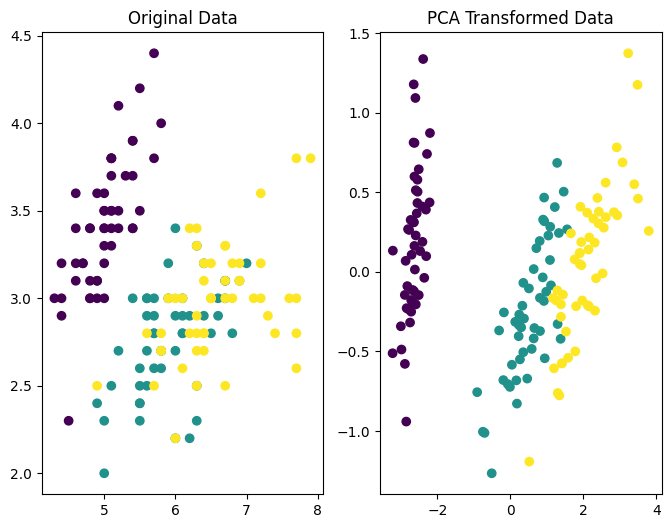

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load classification dataset (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot original vs PCA-transformed data
plt.figure(figsize=(8, 6))

# Plot original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')

# Plot PCA transformed data (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Transformed Data')

plt.show()
